# Q2

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from math import sqrt

# Part 1

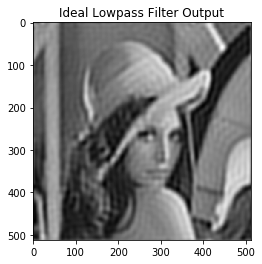

In [3]:
def ideal(im, P):
    m, n = im.shape
    f = np.fft.fft2(im)
    u = np.array(range(0, m))
    v = np.array(range(0, n))
    
    u = u - m/2
    v = v - n/2
    V, U = np.meshgrid(v,u)
    D = np.sqrt(U**2 + V**2)
    H = np.zeros((m,n))
    ind = np.where(D>P)
    H[ind] = 1

    G = np.multiply(np.fft.fftshift(H),np.fft.fftshift(f))
    g = np.fft.ifft2(np.fft.ifftshift(G))
    out = g.real
                
    return out

im = cv2.imread('../input_data/lena.jpg',0)
out = ideal(im, 335)
plt.imshow(out, cmap='gray')
plt.title("Ideal Lowpass Filter Output")
plt.show()

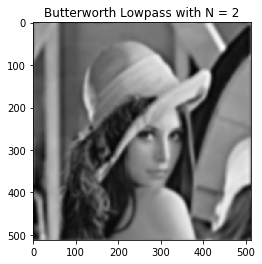

In [4]:
def butter(im, P):
    m, n = im.shape
    f = np.fft.fft2(im)
    u = np.array(range(0, m))
    v = np.array(range(0, n))
    
    u = u - m/2
    v = v - n/2
    V, U = np.meshgrid(v,u)
    D = np.sqrt(U**2 + V**2)
    N = 2
    temp = 1 + ((D/P)**(2*N))
    H = np.ones(im.shape)
    H = H/temp
    G = np.multiply(H,np.fft.fftshift(f))
    g = np.fft.ifft2(np.fft.ifftshift(G))
    out = g.real
      
    return out

out = butter(im, 30)
plt.imshow(out, cmap='gray')
plt.title("Butterworth Lowpass with N = 2")
plt.show()

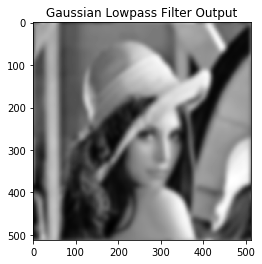

In [5]:
def gaussian(im, P):
    m, n = im.shape
    f = np.fft.fft2(im)
    u = np.array(range(0, m))
    v = np.array(range(0, n))
    
    u = u - m/2
    v = v - n/2
    V, U = np.meshgrid(v,u)
    D = np.sqrt(U**2 + V**2)
    n = 2
    temp = (D**2)/(P**2)
#     H = np.ones(im.shape)
    H = np.exp(-temp/2)
#     plt.imshow(H, cmap='gray')
    G = np.multiply(H,np.fft.fftshift(f))
    g = np.fft.ifft2(np.fft.ifftshift(G))
    out = g.real
      
    return out

out = gaussian(im, 15)
plt.imshow(out, cmap='gray')
plt.title("Gaussian Lowpass Filter Output")
plt.show()

# Part 2

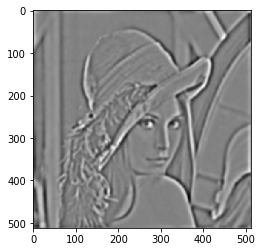

In [6]:
out1 = gaussian(im, 15)
out2 = gaussian(im, 30)
plt.imshow(out2-out1, cmap='gray')
plt.show()

This computation results in a high pass filter. It can be used for edge detection.